  ## Project :- Customer Classification using Logistic Regression

#### Problem Statement: Depending on the Revenue Grid, identify if the customer is High Net Worth or Low Net Worth

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
data=pd.read_csv("existing_base_train.csv")

In [149]:
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [151]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [74]:
data['Average_Credit_Card_Transaction'].max()

662.26

##### Exploratory Data Analaysis

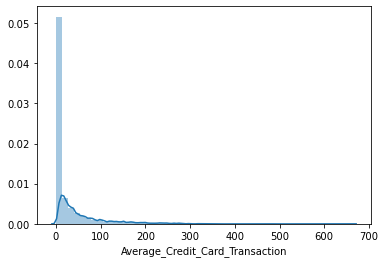

In [152]:
sns.distplot(data['Average_Credit_Card_Transaction'])

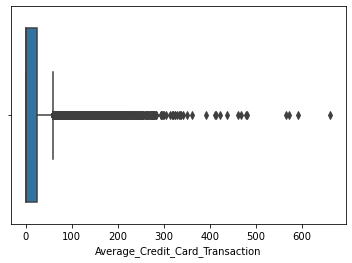

In [153]:
sns.boxplot(data['Average_Credit_Card_Transaction'])

In [154]:
data['Average_Credit_Card_Transaction'].mean()

23.25109428852797

In [155]:
data['Average_Credit_Card_Transaction'].median()

0.0

In [156]:
data['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

In [157]:
data['Personal_Loan'].max()

4905.93

In [158]:
data['children'].unique()

array(['2', 'Zero', '1', '3', '4+'], dtype=object)

In [159]:
data['age_band'].unique()

array(['31-35', '45-50', '36-40', '55-60', '61-65', '65-70', '41-45',
       '51-55', '26-30', '22-25', '71+', 'Unknown', '18-21'], dtype=object)

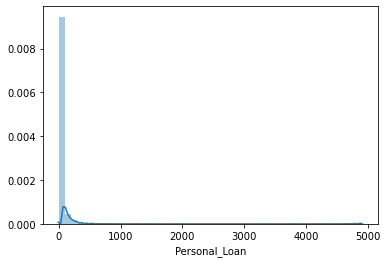

In [160]:
sns.distplot(data['Personal_Loan'])

In [161]:
data['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [162]:
data['occupation'].value_counts()

Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64

In [163]:
data[data['occupation']=='Retired'].count()['occupation']

1799

In [164]:
data[data['occupation']=='Housewife'].count()['occupation']

984

In [165]:
data[data['occupation']=='Professional'].count()['occupation']

1949

In [166]:
data[data['family_income']=='Unknown'].count()['family_income']

108

In [167]:
data['family_income'].unique()

array(['>=35,000', '<22,500, >=20,000', '<25,000, >=22,500',
       '<30,000, >=27,500', '<20,000, >=17,500', '<27,500, >=25,000',
       '< 4,000', '<15,000, >=12,500', '<17,500, >=15,000',
       '< 8,000, >= 4,000', '<12,500, >=10,000', '<10,000, >= 8,000',
       'Unknown'], dtype=object)

In [168]:
from sklearn.preprocessing import LabelEncoder

In [169]:
labelencoder=LabelEncoder()

In [170]:
data["children_n"]=labelencoder.fit_transform(data["children"])

In [171]:
data["age_band_n"]=labelencoder.fit_transform(data["age_band"])

In [172]:
data["status_n"]=labelencoder.fit_transform(data["status"])

In [173]:
data["occupation_n"]=labelencoder.fit_transform(data["occupation"])

In [174]:
data["home_status_n"]=labelencoder.fit_transform(data["home_status"])

In [129]:
data["family_income_n"]=labelencoder.fit_transform(data["family_income"])

In [175]:
data["self_employed_n"]=labelencoder.fit_transform(data["self_employed"])

In [176]:
data["self_employed_partner_n"]=labelencoder.fit_transform(data["self_employed_partner"])

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [177]:
data["TVarea_n"]=labelencoder.fit_transform(data["TVarea"])

In [178]:
data["post_code_n"]=labelencoder.fit_transform(data["post_code"])

In [179]:
data["post_area_n"]=labelencoder.fit_transform(data["post_area"])

In [180]:
data["gender_n"]=labelencoder.fit_transform(data["gender"])

In [181]:
data["region_n"]=labelencoder.fit_transform(data["region"])

In [200]:
data.drop('children', axis=1, inplace=True)

In [201]:
data.drop('age_band', axis=1, inplace=True)

In [202]:
data.drop('status', axis=1, inplace=True)

In [203]:
data.drop('occupation', axis=1, inplace=True)

In [204]:
data.drop('occupation_partner', axis=1, inplace=True)

In [205]:
data.drop('home_status', axis=1, inplace=True)

In [206]:
data.drop('family_income', axis=1, inplace=True)

In [207]:
data.drop('self_employed', axis=1, inplace=True)

In [208]:
data.drop('self_employed_partner', axis=1, inplace=True)

In [209]:
data.drop('TVarea', axis=1, inplace=True)

In [210]:
data.drop('post_code', axis=1, inplace=True)

In [211]:
data.drop('post_area', axis=1, inplace=True)

In [212]:
data.drop('gender', axis=1, inplace=True)

In [213]:
data.drop('region', axis=1, inplace=True)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   year_last_moved                  8124 non-null   int64  
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Life_Insurance                   8124 non-null   float64
 6   Medical_Insurance                8124 non-null   float64
 7   Average_A/C_Balance              8124 non-null   float64
 8   Personal_Loan                    8124 non-null   float64
 9   Investment_in_Mutual_Fund        8124 non-null   float64
 10  Investment_Tax_Saving_Bond       8124 non-null   float64
 11  Home_Loan                        8124 non-null   float64
 12  Online_Purchase_Amou

### Machine Learning Model using Logistic Regression

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Revenue_Grid',axis=1), 
                                                    data['Revenue_Grid'], test_size=0.25, 
                                                    random_state=101)

In [189]:
X_train

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,status_n,occupation_n,home_status_n,self_employed_n,self_employed_partner_n,TVarea_n,post_code_n,post_area_n,gender_n,region_n
1938,2067,3,36-40,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,...,1,6,1,0,0,0,5651,1343,0,1
2305,9942,Zero,55-60,Partner,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,1,5,1,0,0,6,6464,1526,1,11
3212,11188,Zero,45-50,Partner,Professional,Secretarial/Admin,Own Home,">=35,000",No,No,...,1,4,1,0,0,3,2134,535,1,12
1997,2873,2,45-50,Partner,Housewife,Manual Worker,Own Home,"<30,000, >=27,500",No,No,...,1,1,1,0,0,3,6951,1648,0,12
764,5612,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 8,000, >= 4,000",No,No,...,4,5,1,0,0,3,1578,393,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,5683,Zero,51-55,Partner,Professional,Housewife,Own Home,">=35,000",No,No,...,1,4,1,0,0,7,6728,1589,1,8
8006,10285,Zero,61-65,Partner,Retired,Retired,Own Home,"< 8,000, >= 4,000",No,No,...,1,5,1,0,0,6,5299,1241,0,11
1361,5373,2,31-35,Partner,Secretarial/Admin,Manual Worker,Own Home,"<12,500, >=10,000",No,Yes,...,1,6,1,0,1,8,5571,1318,0,7
1547,2430,Zero,51-55,Partner,Professional,Secretarial/Admin,Own Home,">=35,000",Yes,No,...,1,4,1,1,0,2,6620,1566,1,8


In [185]:
y_train

2173    2
1483    2
7994    2
3174    2
387     2
       ..
5695    2
8006    2
1361    2
1547    2
4959    2
Name: Revenue_Grid, Length: 5686, dtype: int64

In [217]:
y_test

4242    1
2057    2
4016    2
7246    2
7746    2
       ..
6958    2
2996    1
3213    2
7176    2
2627    2
Name: Revenue_Grid, Length: 2031, dtype: int64

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
logmodel = LogisticRegression()

In [220]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6093 entries, 1938 to 4959
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           6093 non-null   int64  
 1   year_last_moved                  6093 non-null   int64  
 2   Average_Credit_Card_Transaction  6093 non-null   float64
 3   Balance_Transfer                 6093 non-null   float64
 4   Term_Deposit                     6093 non-null   float64
 5   Life_Insurance                   6093 non-null   float64
 6   Medical_Insurance                6093 non-null   float64
 7   Average_A/C_Balance              6093 non-null   float64
 8   Personal_Loan                    6093 non-null   float64
 9   Investment_in_Mutual_Fund        6093 non-null   float64
 10  Investment_Tax_Saving_Bond       6093 non-null   float64
 11  Home_Loan                        6093 non-null   float64
 12  Online_Purchase_A

In [221]:
logmodel.fit(X_train, y_train)

D:\Shraddha-study\DS\MYAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
predictions = logmodel.predict(X_test)

In [223]:
X_test

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,...,status_n,occupation_n,home_status_n,self_employed_n,self_employed_partner_n,TVarea_n,post_code_n,post_area_n,gender_n,region_n
4242,5026,1989,0.00,0.00,0.00,58.47,28.47,0.00,0.00,36.97,...,1,4,1,0,0,3,1502,380,1,12
2057,5795,1974,17.98,0.53,34.99,154.41,45.95,29.43,33.47,173.36,...,1,1,1,0,0,5,5442,1278,0,5
4016,4175,1969,0.00,29.99,0.00,0.00,20.95,94.32,0.00,174.32,...,2,7,1,0,0,8,2506,635,0,7
7246,9077,1994,0.00,0.00,0.00,0.00,34.99,0.00,0.00,0.00,...,1,4,1,0,0,13,7752,1862,0,10
7746,5933,1979,0.00,34.97,6.49,52.43,0.00,30.93,74.94,116.50,...,1,4,1,0,1,5,7804,1871,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,4716,1985,0.00,131.94,0.00,144.43,11.00,130.24,180.39,282.28,...,1,1,1,0,0,7,1441,361,0,8
2996,2259,1986,0.00,121.96,0.00,109.45,0.00,0.00,0.00,14.99,...,2,4,1,0,0,2,4848,1145,1,8
3213,9818,1998,0.00,0.00,0.00,0.00,39.48,0.00,0.00,0.00,...,1,1,1,0,0,7,5818,1403,0,8
7176,10808,1990,10.99,31.48,19.49,75.93,0.00,57.97,15.99,59.46,...,2,8,1,1,1,3,5072,1197,0,2


In [224]:
y_test

4242    1
2057    2
4016    2
7246    2
7746    2
       ..
6958    2
2996    1
3213    2
7176    2
2627    2
Name: Revenue_Grid, Length: 2031, dtype: int64

In [225]:
y_test.unique()

array([1, 2], dtype=int64)

In [226]:
y_test.head()

4242    1
2057    2
4016    2
7246    2
7746    2
Name: Revenue_Grid, dtype: int64

In [227]:
from sklearn.metrics import classification_report

In [228]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.84      0.52      0.64       223
           2       0.94      0.99      0.97      1808

    accuracy                           0.94      2031
   macro avg       0.89      0.75      0.80      2031
weighted avg       0.93      0.94      0.93      2031



In [235]:
A=X_test["REF_NO"]

In [238]:
B=y_test

In [240]:
sample_df=pd.concat([A,B], axis=1)

In [241]:
sample_df.head()

,REF_NO,Revenue_Grid
4242,5026,1
2057,5795,2
4016,4175,2
7246,9077,2
7746,5933,2


In [243]:
sample_df

,REF_NO,Revenue_Grid
4242,5026,1
2057,5795,2
4016,4175,2
7246,9077,2
7746,5933,2
...,...,...
6958,4716,2
2996,2259,1
3213,9818,2
7176,10808,2


In [245]:
sample_df.to_csv('submission.csv', index=False, header=False)